In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("bank-full.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- We have about 45k instances and 17 attributes
- Out of the 17 attributes, 10 are object type and we quickly do a manual count of how many columns have strings, looking at the head of the data. Which means there are no unwanted strings in any of the numeric columns
- None of them have any NaN values
- Our first step towards exploring the data, will be to check the distributions of each of the attributes 

In [4]:
df.describe()   # this will give us the descriptive stats of all the numeric attributes

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- We see there are negative values in "balance". It could be that the account allows negative balance or it could be an error. Due to the lack of information, we will just assume that these negative values are valid and we will use them just as they are without any treatement
- Another observation about the "balance" attribute is that the range is quiet high
- "campaign" looks interesting. Atleast 75% of the people were contacted only thrice during the campaign
- In "pdays" more than 75% of the values are -1
- More than 75% of the peopele were not contacted at all after the previous campaign


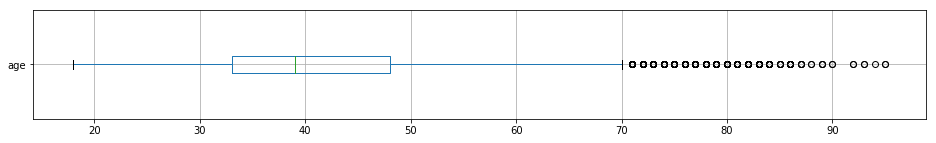

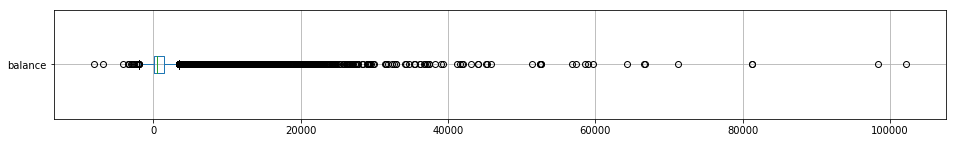

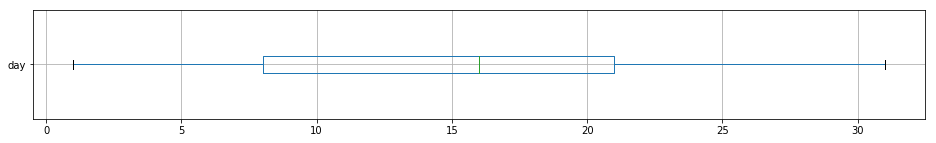

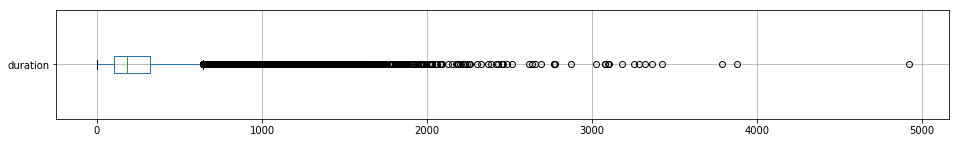

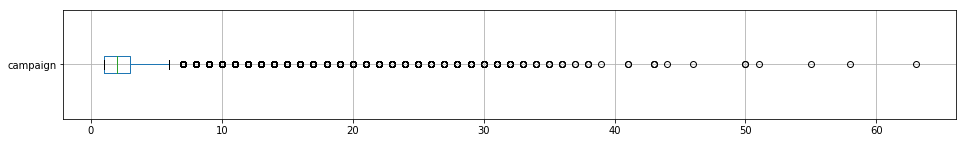

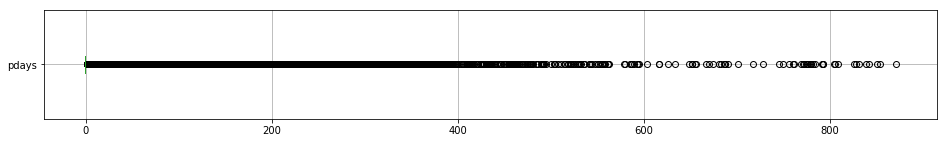

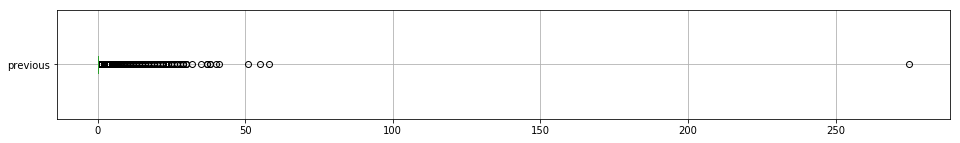

In [5]:
position = 1

for attribute in df.columns:
    if df[attribute].dtype != 'object':
        df[attribute].plot(kind = 'box', vert = False, grid = True, figsize = (16, 2))
        plt.show()


- We could get some insights from the descriptive stats but the box-plots do not seem to be very useful in this case because of the data ( as it is either highly skewed or have 1 or 2 very unique values n huge counts)

In [6]:
len(df.columns)

17

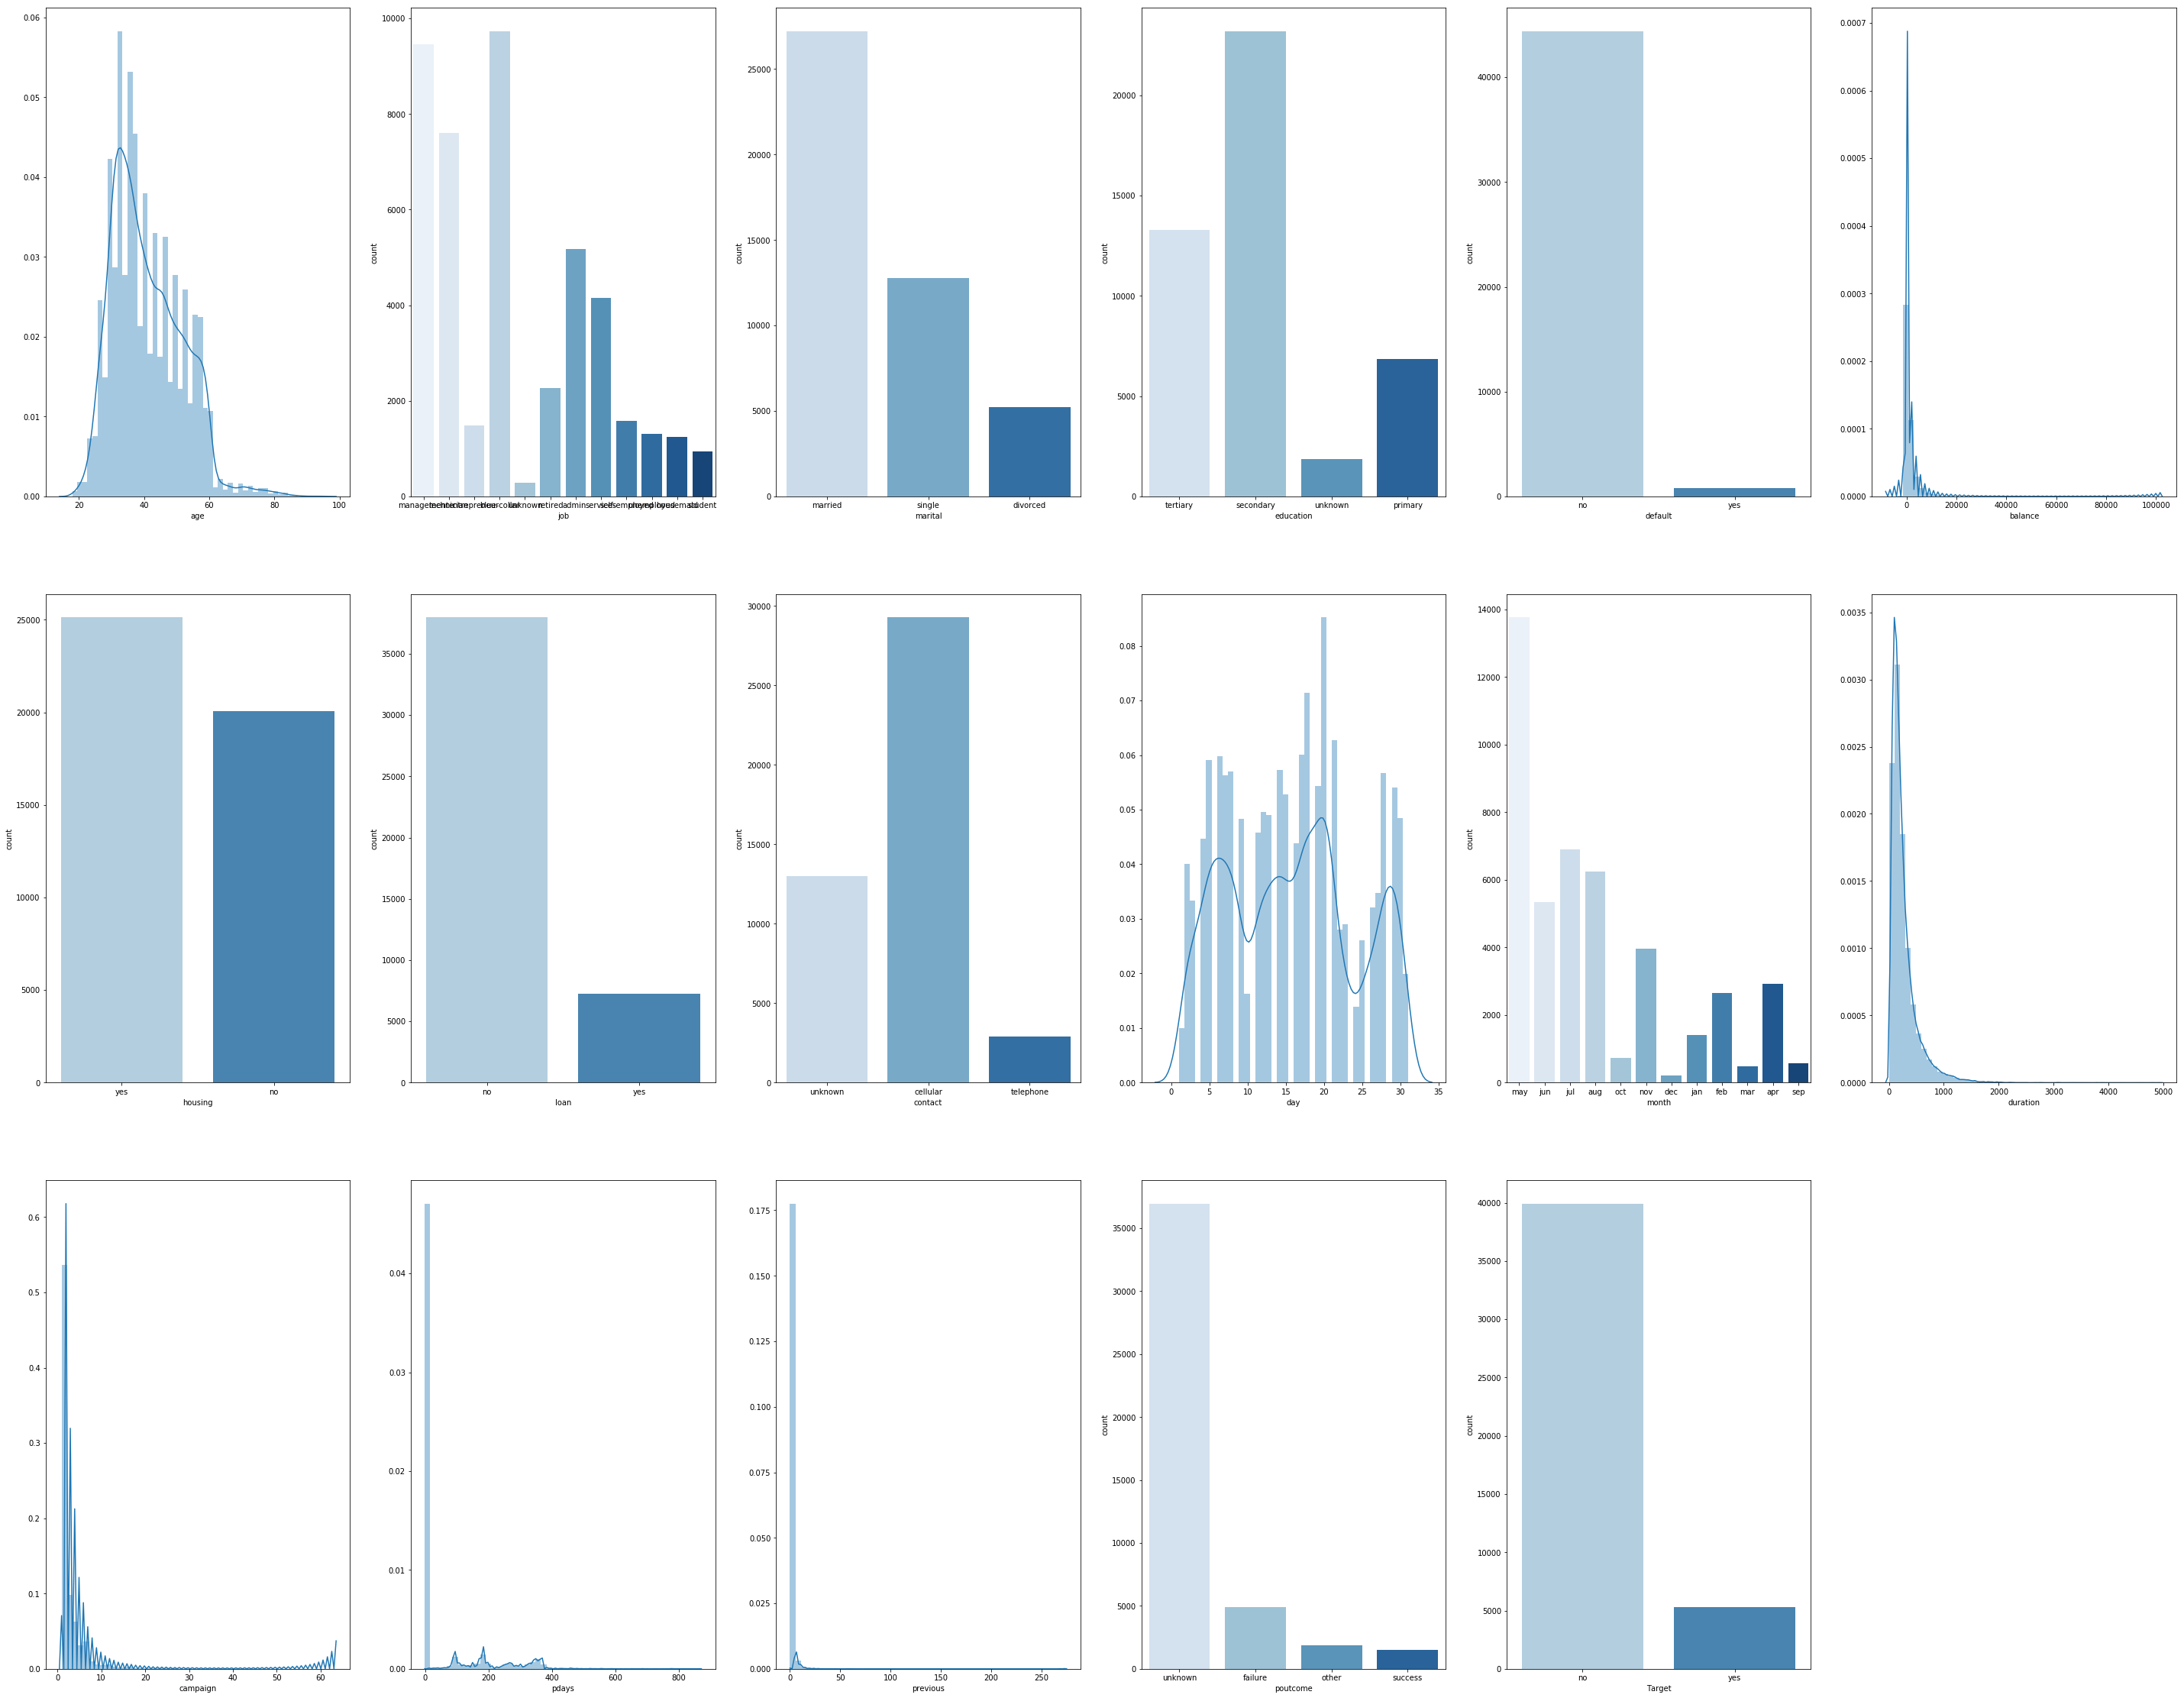

In [7]:
plt.figure(figsize= (50,40))
pos = 1
for feature in df.columns:
    plt.subplot(3, 6, pos)
    if df[feature].dtype == 'object':
        sns.countplot(df[feature], palette= 'Blues')
    else:
        sns.distplot(df[feature], kde= True ) 
    pos += 1
        
        

In [19]:
cat_col = df.columns[df.dtypes == 'object']

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [21]:
X = df.drop(columns= 'Target')
y = df.Target

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# Train and Evaluate

In [31]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data

    score = round(model.score(X_test, y_test), 3)   # accuracy on the test data


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # confusion matrix for y_test and pred_test

    recall = round(tp/(tp+fn), 3)     # calculate recall
    precision = round(tp/(tp+fp), 3)  # calculate precision
    specificity =round(tn/(tn+fp),3)  # calculate specificity
    f1_score =  round(2*precision*recall/(precision + recall), 3)   # calculate f1 score
    
    
    return score, recall, precision, specificity, f1_score  # return all the metrics

In [36]:
# Initialize all of the algorithms

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver= 'liblinear')

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [37]:
result = pd.DataFrame(columns = ['score,', 'recall,', 'precision,', 'specificity,', 'f1_score'])

for model, model_name  in list(zip([lr, dt, nb], ['Logistic_Regression', 'Decision tree', 'Naive_Bayes'])):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)
    
    


In [38]:
result

,"score,","recall,","precision,","specificity,",f1_score
Logistic_Regression,0.889,0.210,0.568,0.979,0.307
Decision tree,0.873,0.489,0.458,0.923,0.473
Naive_Bayes,0.838,0.462,0.353,0.888,0.400


- The overall accuracy of the models is decent but, the class level metrics are subpar

In [44]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

bg = BaggingClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100)
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [45]:
for model, model_name  in list(zip([bg, rf, ab, gb], ['Bagging', ' RandomForest', ' AdaBoost', ' GradientBoostingClassifier'])):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)  

In [46]:
result

,"score,","recall,","precision,","specificity,",f1_score
Logistic_Regression,0.889,0.210,0.568,0.979,0.307
Decision tree,0.873,0.489,0.458,0.923,0.473
Naive_Bayes,0.838,0.462,0.353,0.888,0.400
Bagging,0.901,0.457,0.603,0.960,0.520
RandomForest,0.904,0.421,0.638,0.968,0.507
AdaBoost,0.897,0.337,0.604,0.971,0.433
GradientBoostingClassifier,0.904,0.398,0.646,0.971,0.493
